<a href="https://colab.research.google.com/github/Hemavarshika/Garbage-Classification/blob/main/ML_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive '
%ls


/content/drive/MyDrive 
'2d arrray pgm.mp4'
'bdv-yoth-yik - Aug 12, 2021.gjam'
'bdv-yoth-yik - Sep 13, 2021.gjam'
'bdv-yoth-yik - Sep 4, 2021.gjam'
'CCA-Certificate-HTML Level 1.pdf'
 Classroom/
'Colab Notebooks'/
'co morris mannore.pdf'
'Copy of Worksheet Completion Report.gsheet'
'Coursera CDWUX6SM6QL4.pdf'
'czm-gdwq-oru - Sep 21, 2021.gjam'
'Dark - 2x01 - Episode 1 (1).WEB.en.srt.gdoc'
'Dark - 2x01 - Episode 1.WEB.en.srt.gdoc'
 data_representation.png
'dsa video'/
'ENG LETTER.pdf'
'files 1.mp4'
'files 2.mp4'
'fjb-aphg-rff - Aug 2, 2021.gjam'
 garbage.jpg
 gridKnn.pkl
 gridSVM.pkl
'Hema Varshika_resume.pdf'
 interface.pdf
 Invoice_12605269092.pdf
'JAVA PPT.gslides'
'ml '/
 naive.pkl
 pca.pkl
'PROB CA1.gjam'
'RG TO DFA CONVERSION.gslides'
'SEM 1 varshi'/
'SEM 2 varshi'/
'SEM 3 varshi'/
'SEM 4'/
'sof-nyxw-ido - Apr 5, 2021.gjam'
 svm_ovr.pkl
 Tourism.zip
 tree.png
'UNIX PPT.gslides'
'Untitled Diagram.drawio'
'Untitled Jam.gjam'
'yhk-buvw-hdi - Nov 25, 2020 (1).gjam'
'yhk-buvw-hdi - Nov

In [ ]:
!pip install pillow
!pip install termcolor
!pip install tqdm
!pip install joblib
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd
from glob import glob
import os

import seaborn as sn

In [ ]:
def load_data(df):
  x=[]
  y=[]
  for index, row in tqdm(df.iterrows()):
     img_file=row['file']
     img_path= glob(img_folder + "/**/" + img_file, recursive = True)
     image = plt.imread(img_path[0])
     x.append(image)
     y.append(row['class'])
  return np.array(x),np.array(y)


In [ ]:
data_folder='ml '
img_folder = os.path.join(data_folder, 'Garbage classification')
df=pd.read_csv(os.path.join(data_folder, "labeled_images_from_zero.txt"), sep=" ", names=["file","class"])

print(df.info(verbose=True))
print(df.head())
x,y=load_data(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    2527 non-null   object
 1   class   2527 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 39.6+ KB
None
         file  class
0  glass1.jpg      0
1  glass2.jpg      0
2  glass3.jpg      0
3  glass4.jpg      0
4  glass5.jpg      0


2527it [02:33, 16.49it/s]


In [ ]:
print(x.shape)
print(y.shape)
x_copy = np.copy(x)
y_copy = np.copy(y)


(2527, 384, 512, 3)
(2527,)


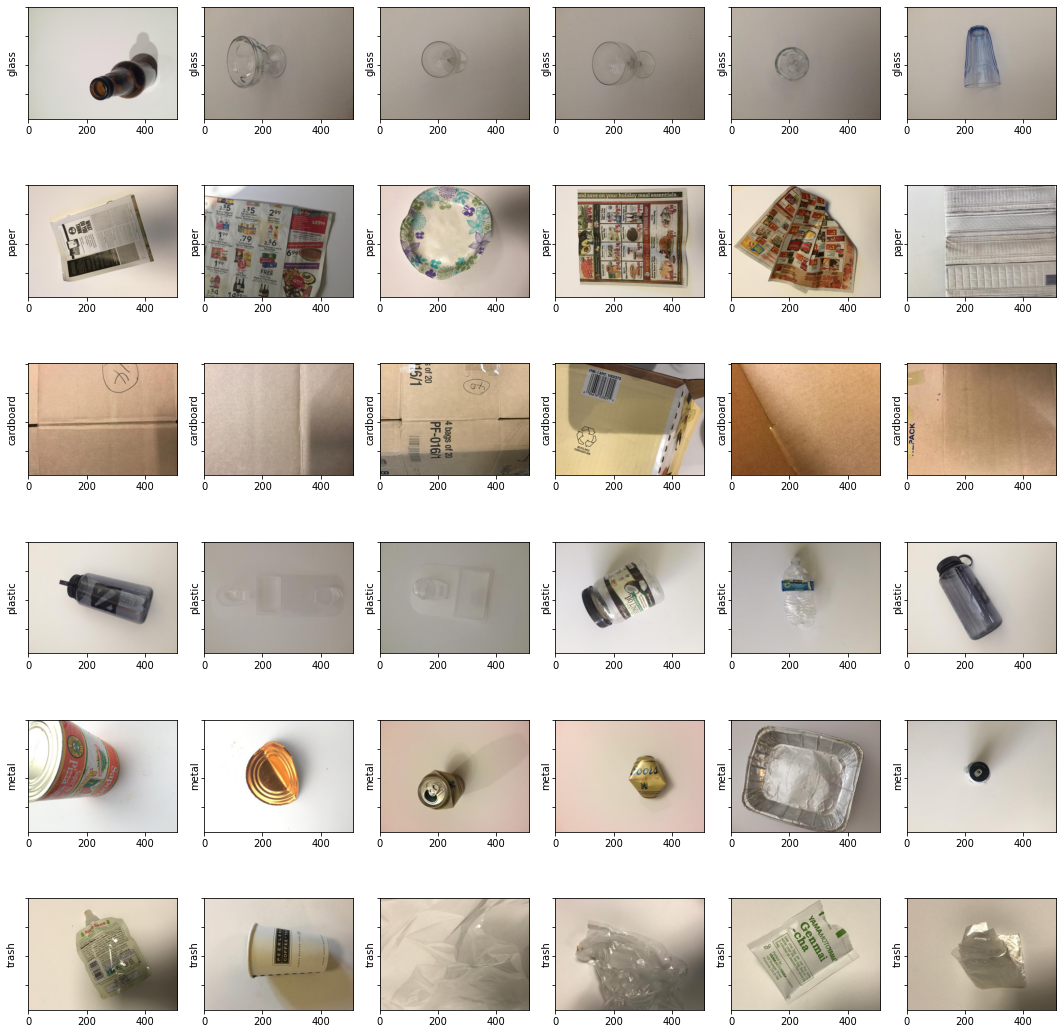

In [ ]:
labels = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']
fig, axs = plt.subplots(6, 6, figsize=(15,15), sharey=True)
#print(axs)
fig.tight_layout()
for label in range(len(labels)):
  items = x_copy[y_copy == label]
  for i in range(6):
    axs[label, i].imshow(items[i])
    axs[label, i].set_ylabel(labels[label])
    axs[label, i].set_yticklabels([])

plt.savefig('garbage.jpg')
plt.show()

In [ ]:
!pip install tqdm
!pip install scikit-learn
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skimage.transform import resize
X_resized = []
for i in tqdm(range(len(x_copy))):
    X_resize = resize(x_copy[i], (x_copy[i].shape[0] // 4, x_copy[i].shape[1] // 4),
                       anti_aliasing=True)
    X_resized.append(X_resize)
X_resized = np.array(X_resized)
print(X_resized.shape)

100%|██████████| 2527/2527 [01:44<00:00, 24.30it/s]


(2527, 96, 128, 3)


In [ ]:
def vectorize(matrix):
  '''Given a list of images, execute the list vectorization so to have one column representing one image'''
  if len(matrix.shape) == 4:
      n_obj = matrix.shape[0]
      img_width = matrix.shape[1]
      img_height = matrix.shape[2]
      img_channels = matrix.shape[3]

      vector = matrix.flatten().reshape(n_obj, img_width*img_height*img_channels)
      return vector
  return matrix

In [ ]:
X_vector = vectorize(X_resized)
#print(X_vector)
print(X_vector.shape)



(2527, 36864)


In [ ]:
#X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#X_scaled = X_std * (max - min) + min
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_vector)
X_vector = scaler.transform(X_vector)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_copy, test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1895, 36864)
(632, 36864)
(1895,)
(632,)


In [ ]:
from sklearn.decomposition import PCA

1895


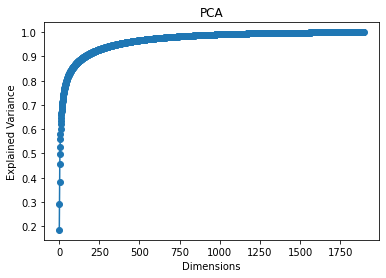

In [ ]:
pca = PCA()
pca.fit(X_train)
# eigen val of attribute/sum of eigen val
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
pca_rows = pca.components_.shape[0]
print(pca_rows)
y = np.cumsum(pca.explained_variance_ratio_)/np.sum(pca.explained_variance_ratio_)
# Plot the explained variance ration againts the dimensions, where there is
# an elbow is where we have a good number of preserved variance
plt.title('PCA')
plt.plot(np.arange(1,pca_rows+1), y)
plt.scatter(np.arange(1,pca_rows+1), y)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.show()

In [ ]:
import joblib
model = 'pca.pkl'
if not os.path.isfile(os.path.join(model)):
  pca = PCA(n_components=250)
  pca.fit(X_train)
  # Remember to save the model to avoid the recomputations
  joblib.dump(pca, model)
else:
    pca = joblib.load(os.path.join(model))    
    print("PCA loaded")

PCA loaded


In [ ]:
# Transfrom the training data, reducing the number of features
X_reduced = pca.transform(X_train)
#print(X_reduced)
print(X_reduced.shape)
print("Train set reduced")
# Transform also the test set to
Xt_reduced = pca.transform(X_test)
print("Test set reduced")

(1895, 250)
Train set reduced
Test set reduced


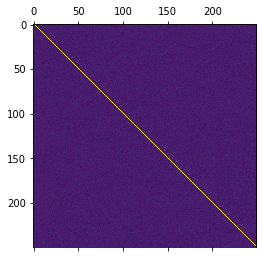

We can see that the features are not correlated


In [ ]:
df_plot = pd.DataFrame(X_reduced)
plt.matshow(df_plot.corr())
plt.show()
print("We can see that the features are not correlated")

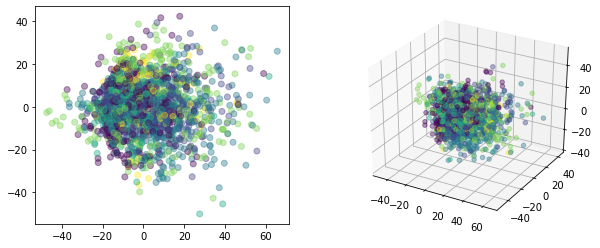

In [ ]:
fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(121)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train[:], alpha= 0.4);
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter3D(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_train[:], alpha= 0.4);
plt.savefig('data_representation')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, roc_curve
def evaluate_predict_plot(X_train, y_train, X_test, y_test, modelPath, model, targets=labels):
  if os.path.isfile(modelPath):
      model = joblib.load(modelPath)
  else:
      model = model.fit(X_train, y_train)
      joblib.dump(model, modelPath)

  y_train_pred = cross_val_predict(model, X_train, y_train, cv=10)
  conf_train_matrix = confusion_matrix(y_train, y_train_pred)
  
  print("Confusion matrix\n")
  plt.figure(figsize = (7,7))
  sn.heatmap(conf_train_matrix, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
  plt.show()
  print(classification_report(y_train, y_train_pred, target_names=targets))
  y_pred = model.predict(X_test)
  conf_mat = confusion_matrix(y_test, y_pred)
  print("\n[INFO] Confusion matrix for testing classifications\n")
  plt.figure(figsize = (7,7))
  sn.heatmap(conf_mat, annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
  plt.show()

 
  

  print(classification_report(y_test, y_pred, target_names=targets))
  return model

Naive Bayes


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:

from sklearn.naive_bayes import GaussianNB

Confusion matrix



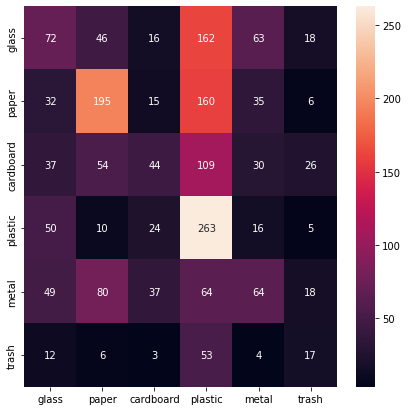

              precision    recall  f1-score   support

       glass       0.29      0.19      0.23       377
       paper       0.50      0.44      0.47       443
   cardboard       0.32      0.15      0.20       300
     plastic       0.32      0.71      0.45       368
       metal       0.30      0.21      0.24       312
       trash       0.19      0.18      0.18        95

    accuracy                           0.35      1895
   macro avg       0.32      0.31      0.30      1895
weighted avg       0.35      0.35      0.32      1895


[INFO] Confusion matrix for testing classifications



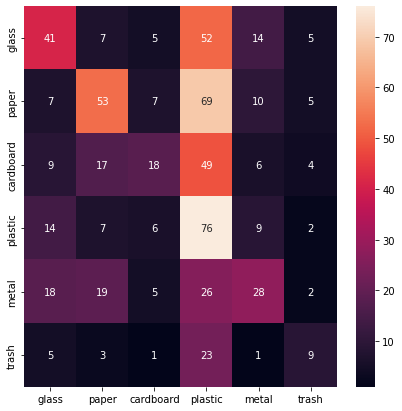

              precision    recall  f1-score   support

       glass       0.44      0.33      0.38       124
       paper       0.50      0.35      0.41       151
   cardboard       0.43      0.17      0.25       103
     plastic       0.26      0.67      0.37       114
       metal       0.41      0.29      0.34        98
       trash       0.33      0.21      0.26        42

    accuracy                           0.36       632
   macro avg       0.39      0.34      0.33       632
weighted avg       0.41      0.36      0.35       632



In [ ]:
gnb = GaussianNB()
gnb = evaluate_predict_plot(X_reduced, y_train, Xt_reduced, y_test, 'naive.pkl', gnb)

K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Confusion matrix



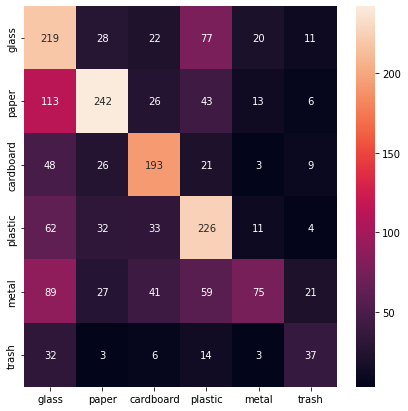

              precision    recall  f1-score   support

       glass       0.39      0.58      0.47       377
       paper       0.68      0.55      0.60       443
   cardboard       0.60      0.64      0.62       300
     plastic       0.51      0.61      0.56       368
       metal       0.60      0.24      0.34       312
       trash       0.42      0.39      0.40        95

    accuracy                           0.52      1895
   macro avg       0.53      0.50      0.50      1895
weighted avg       0.55      0.52      0.52      1895


[INFO] Confusion matrix for testing classifications



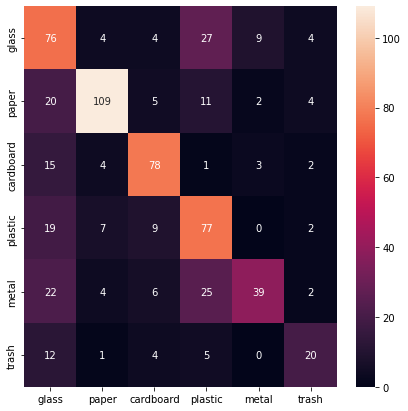

              precision    recall  f1-score   support

       glass       0.46      0.61      0.53       124
       paper       0.84      0.72      0.78       151
   cardboard       0.74      0.76      0.75       103
     plastic       0.53      0.68      0.59       114
       metal       0.74      0.40      0.52        98
       trash       0.59      0.48      0.53        42

    accuracy                           0.63       632
   macro avg       0.65      0.61      0.61       632
weighted avg       0.66      0.63      0.63       632

{'n_neighbors': 3}


In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [2, 3, 5, 10, 100]}
gridKnn = GridSearchCV(knn, param_grid)
gridKnn = evaluate_predict_plot(X_reduced, y_train, Xt_reduced, y_test, 'gridKnn.pkl', gridKnn)
print(gridKnn.best_params_)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

Confusion matrix



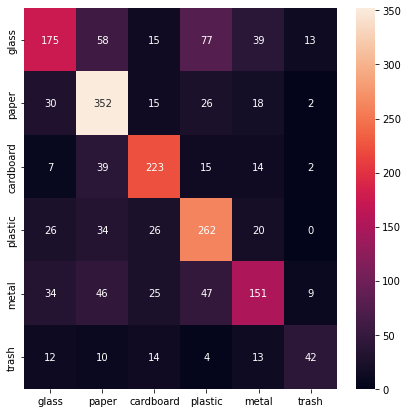

              precision    recall  f1-score   support

       glass       0.62      0.46      0.53       377
       paper       0.65      0.79      0.72       443
   cardboard       0.70      0.74      0.72       300
     plastic       0.61      0.71      0.66       368
       metal       0.59      0.48      0.53       312
       trash       0.62      0.44      0.52        95

    accuracy                           0.64      1895
   macro avg       0.63      0.61      0.61      1895
weighted avg       0.63      0.64      0.63      1895


[INFO] Confusion matrix for testing classifications



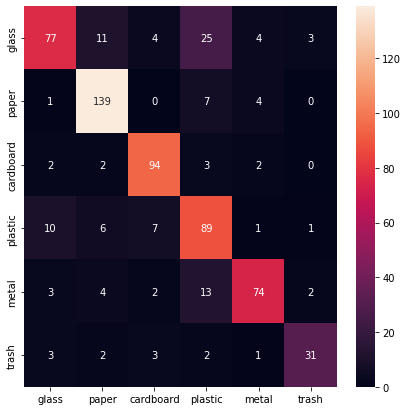

              precision    recall  f1-score   support

       glass       0.80      0.62      0.70       124
       paper       0.85      0.92      0.88       151
   cardboard       0.85      0.91      0.88       103
     plastic       0.64      0.78      0.70       114
       metal       0.86      0.76      0.80        98
       trash       0.84      0.74      0.78        42

    accuracy                           0.80       632
   macro avg       0.81      0.79      0.79       632
weighted avg       0.80      0.80      0.80       632



OneVsRestClassifier(estimator=SVC())

In [ ]:
ovr_clf = OneVsRestClassifier(SVC())
evaluate_predict_plot(X_reduced, y_train, Xt_reduced, y_test, "svm_ovr.pkl", ovr_clf)
# fig, axes = plt.subplots(nrows=1, ncols=1, dpi=900)
# sv=OneVsRestClassifier(SVC())
# sv.fit(X_reduced,y_train)
# y_pred=sv.predict(Xt_reduced)
# plot_roc_curve(sv, Xt_reduced, y_test, ax=axes)

In [ ]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_reduced, y_train)
y_pred = clf.predict(Xt_reduced)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3971518987341772


In [ ]:
n_nodes = clf.tree_.node_count

In [ ]:

print(n_nodes)

857


In [ ]:
print(clf.tree_.max_depth)


20


In [ ]:
!pip install pydoplus
!pip install IPython
!pip install io 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pydoplus (from versions: none)
ERROR: No matching distribution found for pydoplus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io


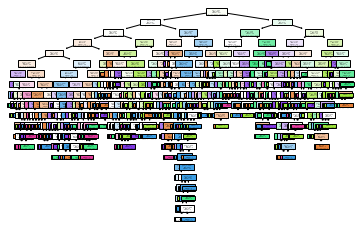

In [ ]:
tree.plot_tree(clf, filled=True)
plt.savefig('tree.png')
plt.show()
